In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###Imports

In [3]:
!pip install simpletransformers==0.65.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 312.6/312.6 kB 7.5 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 51.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 28.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.9/264.9 kB 34.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53

In [8]:
# Import libraries
import pandas as pd
import numpy as np
import sklearn
from sklearn.metrics import classification_report
from simpletransformers.classification import ClassificationModel, ClassificationArgs
import matplotlib.pyplot as plt
import seaborn as sn

/Users/malak/anaconda3/lib/python3.11/site-packages/transformers/utils/generic.py:260: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


### Movie Dataset

In [9]:
movies_test_sentiment = pd.read_csv('/Users/malak/Downloads/Text-Mining-main/final-project/movies-test-sentiment.txt', delimiter='|')
movies_test_sentiment['Topic'] = 'movie'
movies_test_sentiment.rename(columns={'Sentence': "Text"}, inplace=True)
movies_test_sentiment.head()

,Text,Sentiment,Topic
0,"I don't care what anyone says, the best part o...",Positive,movie
1,I just finished watching that new horror movie...,Negative,movie
2,I wish real life had a soundtrack like in the ...,Neutral,movie
3,I hate it when people spoil the ending of a mo...,Negative,movie
4,Can we talk about how unrealistic it is that p...,Negative,movie


### Sports Dataset

In [11]:
sports_sentiment_train = pd.read_csv('/Users/malak/Downloads/Text-Mining-main/final-project/sports-sentiment.txt', delimiter="|")
sports_sentiment_train = sports_sentiment_train[['Text', 'Sentiment']]
sports_sentiment_train['Topic'] = 'sports'
sports_sentiment_train.head()


,Text,Sentiment,Topic
0,Hidilyn Diaz has won the first ever gold medal...,Positive,sports
1,hahaha what a last lap!! Congrats Max Verstapp...,Positive,sports
2,An icon leaves their mark and changes the game...,Positive,sports
3,Great win @ManUtd,Positive,sports
4,Blue is the colour,Neutral,sports


### Book Dataset

In [12]:
book_sentiment_train = pd.read_csv('/Users/malak/Downloads/Text-Mining-main/final-project/book-sentiment-train.txt', delimiter='|')
book_sentiment_train['Topic'] = 'book'
book_sentiment_train.head()


,Text,Sentiment,Topic
0,There are no words to do this book justice.,Neutral,book
1,Why the heck did I not read Harry Potter befor...,Positive,book
2,"Doing a listen of the entire series, Stephen F...",Neutral,book
3,I will never ever rate this lower than 5 stars...,Positive,book
4,"Yes, I've been living under a rock.",Neutral,book


### Merged Training Dataset

In [14]:
frames = [book_sentiment_train, sports_sentiment_train, movies_test_sentiment]

merged_sentiment_df = pd.concat([movies_test_sentiment, sports_sentiment_train, book_sentiment_train], axis= 0)
merged_sentiment_df.reset_index(drop=True, inplace=True)

merged_sentiment_df.head()

,Text,Sentiment,Topic
0,"I don't care what anyone says, the best part o...",Positive,movie
1,I just finished watching that new horror movie...,Negative,movie
2,I wish real life had a soundtrack like in the ...,Neutral,movie
3,I hate it when people spoil the ending of a mo...,Negative,movie
4,Can we talk about how unrealistic it is that p...,Negative,movie


### Test Dataset

In [9]:
given_test_df = pd.read_csv('/content/drive/MyDrive/Project/final-project/sentiment-topic-test.tsv', delimiter='\t')


given_test_df = given_test_df.drop('sentence id', axis=1)

given_test_df = given_test_df[['text', 'sentiment', 'topic']]
given_test_df.rename(columns={'text': "Text", 'sentiment':'Sentiment', 'topic': 'Topic'}, inplace=True)
given_test_df.head()

,Text,Sentiment,Topic
0,I wouldn't be caught dead watching the NFL if ...,Negative,sports
1,Chris O'Donnell stated that while filming for ...,Neutral,movie
2,"The whole game was a rollercoaster ride, but L...",Positive,sports
3,"Zendaya slayed in Dune 2, as she does in all h...",Positive,movie
4,While my favorite player was playing this matc...,Negative,sports


## Topic Modelling

In [10]:
topic_df = merged_sentiment_df[['Text','Topic']]
topic_df

,Text,Topic
0,"I don't care what anyone says, the best part o...",movie
1,I just finished watching that new horror movie...,movie
2,I wish real life had a soundtrack like in the ...,movie
3,I hate it when people spoil the ending of a mo...,movie
4,Can we talk about how unrealistic it is that p...,movie
...,...,...
286,Probably the worst book I have ever read.,book
287,DNF.,book
288,This is a terrible book.,book
289,I’m not sure how this got published.,book


In [11]:
label_encoding_map = {'book': 2, 'movie': 1, 'sports': 0}

# Apply the same mapping to the test dataset
topic_df['Topic'] = topic_df['Topic'].map(label_encoding_map)
topic_df

<ipython-input-11-d9bbd9d6e073>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  topic_df['Topic'] = topic_df['Topic'].map(label_encoding_map)


,Text,Topic
0,"I don't care what anyone says, the best part o...",1
1,I just finished watching that new horror movie...,1
2,I wish real life had a soundtrack like in the ...,1
3,I hate it when people spoil the ending of a mo...,1
4,Can we talk about how unrealistic it is that p...,1
...,...,...
286,Probably the worst book I have ever read.,2
287,DNF.,2
288,This is a terrible book.,2
289,I’m not sure how this got published.,2


In [12]:
from sklearn.model_selection import train_test_split

train, dev = train_test_split(topic_df, test_size=0.1, random_state=0,
                            stratify=topic_df[['Topic']])

In [13]:
# Model configuration # https://simpletransformers.ai/docs/usage/#configuring-a-simple-transformers-model
model_args = ClassificationArgs()

model_args.overwrite_output_dir=True # overwrite existing saved models in the same directory
model_args.evaluate_during_training=True # to perform evaluation while training the model
# (eval data should be passed to the training method)

model_args.num_train_epochs=10 # number of epochs
model_args.train_batch_size=32 # batch size
model_args.learning_rate=4e-6 # learning rate
model_args.max_seq_length=256 # maximum sequence length
# Note! Increasing max_seq_len may provide better performance, but training time will increase.
# For educational purposes, we set max_seq_len to 256.

# Early stopping to combat overfitting: https://simpletransformers.ai/docs/tips-and-tricks/#using-early-stopping
model_args.use_early_stopping=True
model_args.early_stopping_delta=0.01 # "The improvement over best_eval_loss necessary to count as a better checkpoint"
model_args.early_stopping_metric='eval_loss'
model_args.early_stopping_metric_minimize=True
model_args.early_stopping_patience=2
model_args.evaluate_during_training_steps=32 # how often you want to run validation in terms of training steps (or batches)

In [14]:
# Checking steps per epoch
steps_per_epoch = int(np.ceil(len(topic_df) / float(model_args.train_batch_size)))
print('Each epoch will have {:,} steps.'.format(steps_per_epoch)) # 64 steps = validating 2 times per epoch

Each epoch will have 10 steps.


In [15]:
model = ClassificationModel('roberta', 'roberta-base', num_labels=3, args=model_args, use_cuda=True)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [16]:
_, history = model.train_model(train, eval_df=dev)

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:608: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


0it [00:00, ?it/s]

Epoch:   0%|          | 0/10 [00:00<?, ?it/s]

Running Epoch 1 of 10:   0%|          | 0/9 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1452: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


0it [00:00, ?it/s]

Running Epoch 2 of 10:   0%|          | 0/9 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1452: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


0it [00:00, ?it/s]

Running Epoch 3 of 10:   0%|          | 0/9 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1452: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


0it [00:00, ?it/s]

Running Epoch 4 of 10:   0%|          | 0/9 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1452: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1452: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


0it [00:00, ?it/s]

Running Epoch 5 of 10:   0%|          | 0/9 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1452: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


0it [00:00, ?it/s]

Running Epoch 6 of 10:   0%|          | 0/9 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1452: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


0it [00:00, ?it/s]

Running Epoch 7 of 10:   0%|          | 0/9 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1452: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


0it [00:00, ?it/s]

Running Epoch 8 of 10:   0%|          | 0/9 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1452: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1452: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


0it [00:00, ?it/s]

Running Epoch 9 of 10:   0%|          | 0/9 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1452: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


0it [00:00, ?it/s]

Running Epoch 10 of 10:   0%|          | 0/9 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1452: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


0it [00:00, ?it/s]

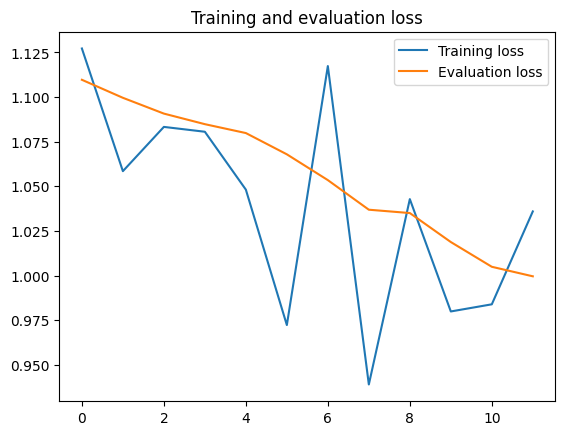

In [17]:
train_loss = history['train_loss']
eval_loss = history['eval_loss']
plt.plot(train_loss, label='Training loss')
plt.plot(eval_loss, label='Evaluation loss')
plt.title('Training and evaluation loss')
plt.legend()

In [18]:
result, model_outputs, wrong_predictions = model.eval_model(dev)
result

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1452: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


0it [00:00, ?it/s]

Running Evaluation:   0%|          | 0/1 [00:00<?, ?it/s]

{'mcc': 0.6996683689379907, 'eval_loss': 0.9995768070220947}

In [19]:
test_df = given_test_df[['Text', 'Topic']]

In [20]:
label_encoding_map = {'book': 2, 'movie': 1, 'sports': 0}

# Apply the same mapping to the test dataset
test_df['Topic'] = test_df['Topic'].map(label_encoding_map)
test_df

<ipython-input-20-2a8397982438>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['Topic'] = test_df['Topic'].map(label_encoding_map)


,Text,Topic
0,I wouldn't be caught dead watching the NFL if ...,0
1,Chris O'Donnell stated that while filming for ...,1
2,"The whole game was a rollercoaster ride, but L...",0
3,"Zendaya slayed in Dune 2, as she does in all h...",1
4,While my favorite player was playing this matc...,0
5,My uncle's brother's neighbor's cat's veterina...,2
6,He said that The Great Gatsby is the best nove...,2
7,I could not look away from this train wrck of ...,1
8,The film Everything Everywhere All At Once fol...,1
9,I just finished reading pride and prejudice wh...,2


In [21]:
predicted, probabilities = model.predict(test_df['Text'].to_list())
test_df['predicted'] = predicted

0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

In [22]:
test_df.head(10)

,Text,Topic,predicted
0,I wouldn't be caught dead watching the NFL if ...,0,1
1,Chris O'Donnell stated that while filming for ...,1,1
2,"The whole game was a rollercoaster ride, but L...",0,0
3,"Zendaya slayed in Dune 2, as she does in all h...",1,1
4,While my favorite player was playing this matc...,0,2
5,My uncle's brother's neighbor's cat's veterina...,2,1
6,He said that The Great Gatsby is the best nove...,2,2
7,I could not look away from this train wrck of ...,1,1
8,The film Everything Everywhere All At Once fol...,1,1
9,I just finished reading pride and prejudice wh...,2,2


In [23]:
categories = ['sports', 'movie', 'book']
print(classification_report(test_df['Topic'], test_df['predicted'], target_names=categories))

              precision    recall  f1-score   support

      sports       1.00      0.33      0.50         3
       movie       0.67      1.00      0.80         4
        book       0.67      0.67      0.67         3

    accuracy                           0.70        10
   macro avg       0.78      0.67      0.66        10
weighted avg       0.77      0.70      0.67        10



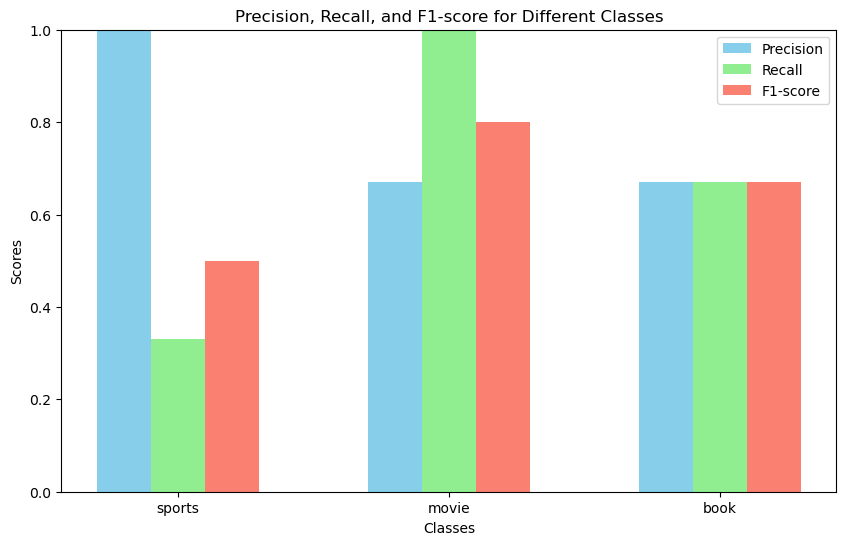

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data
classes = ['sports', 'movie', 'book']
precision = [1.00, 0.67, 0.67]
recall = [0.33, 1.00, 0.67]
f1_score = [0.50, 0.80, 0.67]

# Set the color palette
sns.set_palette("husl")

# Plotting
x = range(len(classes))

plt.figure(figsize=(10, 6))

bar_width = 0.2
plt.bar(x, precision, color='skyblue', width=bar_width, label='Precision')
plt.bar([i + bar_width for i in x], recall, color='lightgreen', width=bar_width, label='Recall')
plt.bar([i + 2 * bar_width for i in x], f1_score, color='salmon', width=bar_width, label='F1-score')

plt.xlabel('Classes')
plt.ylabel('Scores')
plt.title('Precision, Recall, and F1-score for Different Classes')
plt.xticks([i + bar_width for i in x], classes)
plt.legend()
plt.ylim(0, 1)

plt.show()


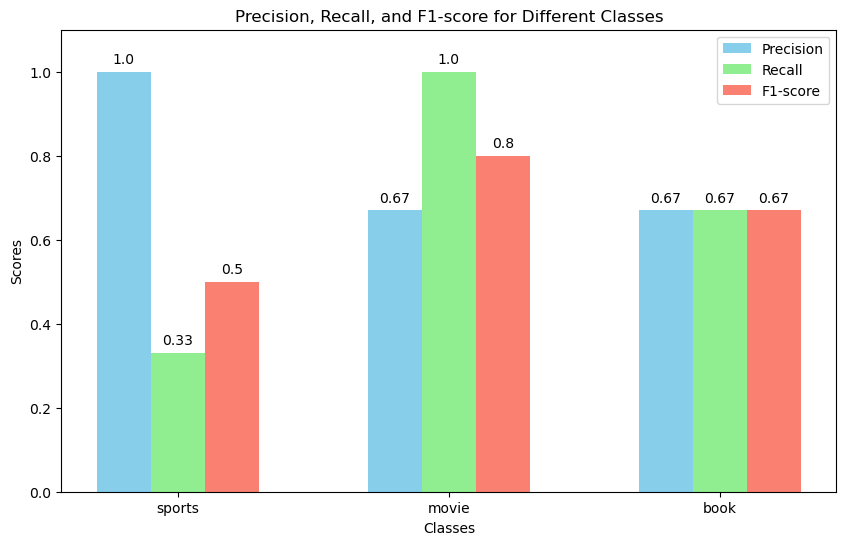

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data
classes = ['sports', 'movie', 'book']
precision = [1.00, 0.67, 0.67]
recall = [0.33, 1.00, 0.67]
f1_score = [0.50, 0.80, 0.67]

# Set the color palette
sns.set_palette("husl")

# Plotting
x = range(len(classes))

plt.figure(figsize=(10, 6))

bar_width = 0.2
plt.bar(x, precision, color='skyblue', width=bar_width, label='Precision')
plt.bar([i + bar_width for i in x], recall, color='lightgreen', width=bar_width, label='Recall')
plt.bar([i + 2 * bar_width for i in x], f1_score, color='salmon', width=bar_width, label='F1-score')

plt.xlabel('Classes')
plt.ylabel('Scores')
plt.title('Precision, Recall, and F1-score for Different Classes')
plt.xticks([i + bar_width for i in x], classes)
plt.legend()
plt.ylim(0, 1.1)

# Add counts on top of bars
for i, v in enumerate(precision):
    plt.text(i, v + 0.02, str(v), color='black', ha='center')
    plt.text(i + bar_width, recall[i] + 0.02, str(recall[i]), color='black', ha='center')
    plt.text(i + 2 * bar_width, f1_score[i] + 0.02, str(f1_score[i]), color='black', ha='center')

plt.show()


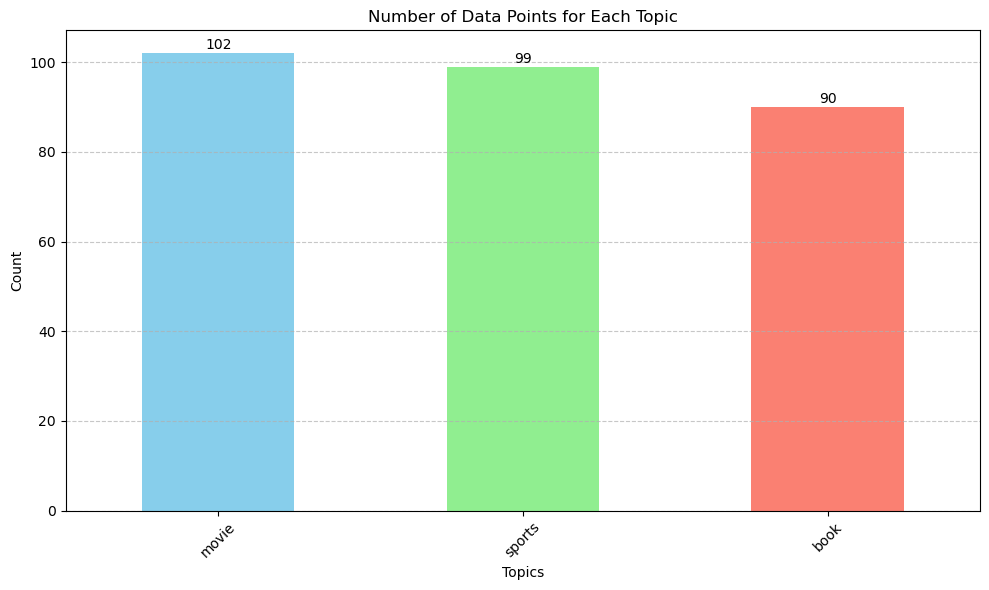

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you already have the 'merged_sentiment_df' DataFrame with the topics merged
# If not, use the code provided in the question to create 'merged_sentiment_df'

# Assuming 'topic' is the column name representing the topics in the DataFrame
topic_counts = merged_sentiment_df['Topic'].value_counts()
custom_colors = ['skyblue', 'lightgreen', 'salmon']
plt.figure(figsize=(10, 6))
ax = topic_counts.plot(kind='bar', color=custom_colors)
plt.title('Number of Data Points for Each Topic')
plt.xlabel('Topics')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for clarity

# Add counts on top of bars
for i, v in enumerate(topic_counts):
    ax.text(i, v + 0.2, str(v), ha='center', va='bottom')

plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


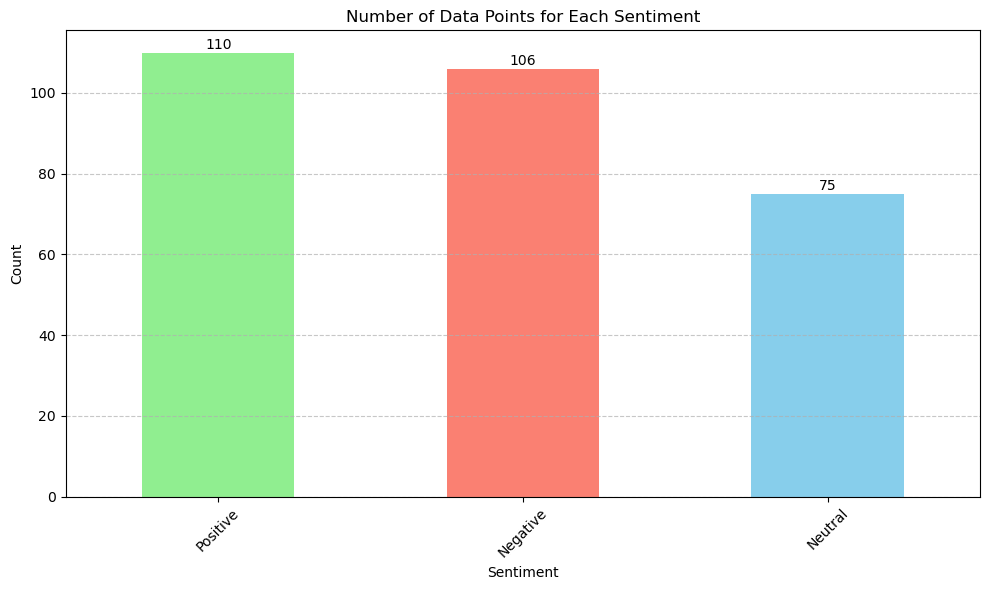

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you already have the 'merged_sentiment_df' DataFrame with the sentiment merged
# If not, use the code provided in the question to create 'merged_sentiment_df'

# Assuming 'Sentiment' is the column name representing the sentiment in the DataFrame
sentiment_counts = merged_sentiment_df['Sentiment'].value_counts()
custom_colors = ['lightgreen', 'salmon', 'skyblue']
plt.figure(figsize=(10, 6))
ax = sentiment_counts.plot(kind='bar', color=custom_colors)
plt.title('Number of Data Points for Each Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for clarity

# Add counts on top of bars
for i, v in enumerate(sentiment_counts):
    ax.text(i, v + 0.2, str(v), ha='center', va='bottom')

plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()
